# Proyecto AirBnB Madrid

Uno de nuestros clientes opera en el mercado de inmuebles. Está especialmente
interesado en Madrid, donde posee una cantidad importante de viviendas
publicadas en la plataforma AirBnB y nos pide que le asesoremos respondiendo a
la siguiente pregunta:

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué puedo hacer para optimizar el precio de mis viviendas?
</div>

El objetivo del proyecto será elaborar un Data Storytelling que de respuesta a
nuestro cliente a traves de un analisis y explicacion sencilla.

# 1. Data

Para realizar este proyecto contamos con el siguiente set de datos:

| Fichero                          | Descripción                                                                 |
|----------------------------------|-----------------------------------------------------------------------------|
| airbnb_madrid_host.parquet       | Información del propietario de cada vivienda.                               |
| airbnb_madrid_location.parquet   | Información de la localización de cada vivienda.                            |
| airbnb_madrid_property.parquet   | Información de la vivienda.                                                 |
| airbnb_madrid_conditions.parquet | Información de las condiciones de cada vivienda para poder alquilarla.      |
| airbnb_madrid_reviews.parquet    | Información de las reseñas de cada vivienda.                                |

In [2]:
#Importo pandas, seaborn, plotly y matplotlib ya que son las bibliotecas que voy a usar mas adelante

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Y en cada set de datos se cuenta con las siguientes variables:

In [3]:
#Importo el resto de parquets por orden

df_host = pd.read_parquet(r'C:\Users\javier.pina\Desktop\PLAN PIÑA\NUCLIO\2.Stadistica\Proyecto final\airbnb_madrid_host (1).parquet')
df_location = pd.read_parquet(r'C:\Users\javier.pina\Desktop\PLAN PIÑA\NUCLIO\2.Stadistica\Proyecto final\airbnb_madrid_location (1).parquet')
df_property = pd.read_parquet(r'C:\Users\javier.pina\Desktop\PLAN PIÑA\NUCLIO\2.Stadistica\Proyecto final\airbnb_madrid_property (1).parquet')
df_conditions = pd.read_parquet(r'C:\Users\javier.pina\Desktop\PLAN PIÑA\NUCLIO\2.Stadistica\Proyecto final\airbnb_madrid_conditions (1).parquet')
df_reviews = pd.read_parquet(r'C:\Users\javier.pina\Desktop\PLAN PIÑA\NUCLIO\2.Stadistica\Proyecto final\airbnb_madrid_reviews (1).parquet')


In [4]:
# Hago un info y printo cada uno de nuestros parquets para ver la info de manera visual y consultarla en caso de que lo necesite mas adelante

df_host.info()
df_host

<class 'pandas.core.frame.DataFrame'>
Index: 21020 entries, 0 to 21365
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                21020 non-null  int64  
 1   host_response_time                16556 non-null  object 
 2   host_response_rate                16556 non-null  float64
 3   host_is_superhost                 21020 non-null  int64  
 4   host_has_profile_pic              21020 non-null  int64  
 5   host_identity_verified            21020 non-null  int64  
 6   host_verifications_email          21020 non-null  int64  
 7   host_verifications_phone          21020 non-null  int64  
 8   host_verifications_reviews        21020 non-null  int64  
 9   host_verifications_facebook       21020 non-null  int64  
 10  host_verifications_government_id  21020 non-null  int64  
 11  calculated_host_listings_count    21020 non-null  int64  
 12  host_seni

,id,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,host_verifications_email,host_verifications_phone,host_verifications_reviews,host_verifications_facebook,host_verifications_government_id,calculated_host_listings_count,host_seniority
0,0,within_an_hour,100.0,1,1,0,1,1,1,0,1,1,3921
1,1,None,NaN,0,1,1,1,1,1,0,1,2,3610
2,2,within_an_hour,100.0,0,1,0,1,1,1,0,1,6,3614
3,3,within_a_few_hours,100.0,0,1,1,1,1,1,1,1,1,3572
4,4,within_an_hour,100.0,1,1,0,1,1,1,1,0,1,3572
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21360,21360,None,NaN,0,1,0,1,1,0,0,1,1,4
21361,21361,within_an_hour,100.0,0,1,1,1,1,1,1,0,2,2696
21363,21363,None,NaN,0,1,0,1,1,0,0,0,1,4
21364,21364,within_an_hour,100.0,0,1,0,1,1,1,0,1,4,2045


In [5]:
df_conditions.info()
df_conditions

<class 'pandas.core.frame.DataFrame'>
Index: 21020 entries, 0 to 21365
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                21020 non-null  int64  
 1   price                             21020 non-null  float64
 2   minimum_nights                    21020 non-null  int64  
 3   maximum_nights                    21020 non-null  int64  
 4   cancellation_policy               21020 non-null  object 
 5   require_guest_profile_picture     21020 non-null  int64  
 6   require_guest_phone_verification  21020 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.3+ MB


,id,price,minimum_nights,maximum_nights,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,0,70.0,1,365,flexible,0,0
1,1,17.0,4,40,strict_14_with_grace_period,0,0
2,2,50.0,15,730,moderate,0,0
3,3,80.0,5,730,moderate,0,0
4,4,115.0,3,10,moderate,0,0
...,...,...,...,...,...,...,...
21360,21360,30.0,1,4,flexible,0,0
21361,21361,35.0,3,1125,flexible,0,0
21363,21363,59.0,25,1125,flexible,0,0
21364,21364,49.0,1,30,flexible,0,0


In [6]:
df_location.info()
df_location

<class 'pandas.core.frame.DataFrame'>
Index: 21020 entries, 0 to 21365
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21020 non-null  int64  
 1   neighbourhood        21020 non-null  object 
 2   neighbourhood_group  21020 non-null  object 
 3   latitude             21020 non-null  float64
 4   longitude            21020 non-null  float64
 5   dist_km_sol          21020 non-null  float64
 6   dist_km_airport      21020 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.3+ MB


,id,neighbourhood,neighbourhood_group,latitude,longitude,dist_km_sol,dist_km_airport
0,0,Chamartín,Chamartín,40.45628,-3.67763,6.769415,11.162062
1,1,Aluche,Latina,40.40341,-3.74084,4.433720,18.198818
2,2,Legazpi,Arganzuela,40.38695,-3.69304,4.552379,15.799212
3,3,Malasaña,Centro,40.42202,-3.70395,1.848181,14.020964
4,4,Justicia,Centro,40.41995,-3.69764,2.317480,13.364384
...,...,...,...,...,...,...,...
21360,21360,Centro,Centro,40.42623,-3.71067,2.139367,14.415525
21361,21361,Centro,Centro,40.41298,-3.70643,1.200616,14.376883
21363,21363,Palacio,Centro,40.42049,-3.70910,1.307754,14.138335
21364,21364,La Latina,Centro,40.41241,-3.70854,1.192563,14.628332


In [7]:
df_property.info()
df_property

<class 'pandas.core.frame.DataFrame'>
Index: 21020 entries, 0 to 21365
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          21020 non-null  int64  
 1   property_type               21020 non-null  object 
 2   room_type                   21020 non-null  object 
 3   accommodates                21020 non-null  int64  
 4   bathrooms                   21020 non-null  float64
 5   bedrooms                    21020 non-null  float64
 6   beds                        21020 non-null  float64
 7   bed_type                    21020 non-null  object 
 8   amenities_wifi_internet     21020 non-null  int64  
 9   amenities_tv                21020 non-null  int64  
 10  amenities_air_conditioning  21020 non-null  int64  
 11  amenities_heating           21020 non-null  int64  
 12  amenities_kitchen           21020 non-null  int64  
dtypes: float64(3), int64(7), object(3)
m

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities_wifi_internet,amenities_tv,amenities_air_conditioning,amenities_heating,amenities_kitchen
0,0,apartment,private_room,2,1.0,1.0,0.0,real_bed,1,0,1,1,1
1,1,apartment,private_room,1,1.0,1.0,1.0,real_bed,1,1,1,1,1
2,2,apartment,entire_home_apt,6,2.0,3.0,5.0,real_bed,1,1,1,1,1
3,3,apartment,entire_home_apt,3,1.0,0.0,1.0,real_bed,1,1,1,1,1
4,4,apartment,entire_home_apt,4,1.5,2.0,3.0,real_bed,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21360,21360,apartment,private_room,4,1.0,1.0,3.0,real_bed,1,0,0,0,1
21361,21361,bed_and_breakfast,private_room,2,1.0,1.0,0.0,real_bed,1,0,0,1,1
21363,21363,apartment,entire_home_apt,5,1.0,2.0,1.0,real_bed,1,1,0,1,1
21364,21364,apartment,private_room,2,1.0,1.0,2.0,real_bed,1,1,1,1,1


In [8]:
df_reviews.info()
df_reviews

<class 'pandas.core.frame.DataFrame'>
Index: 21020 entries, 0 to 21365
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           21020 non-null  int64  
 1   number_of_reviews            21020 non-null  int64  
 2   number_of_reviews_ltm        21020 non-null  int64  
 3   review_scores_rating         16726 non-null  float64
 4   review_scores_accuracy       16725 non-null  float64
 5   review_scores_cleanliness    16727 non-null  float64
 6   review_scores_checkin        16728 non-null  float64
 7   review_scores_communication  16728 non-null  float64
 8   review_scores_location       16725 non-null  float64
 9   review_scores_value          16724 non-null  float64
 10  reviews_per_month            16982 non-null  float64
 11  days_since_last_review       21020 non-null  int64  
 12  days_since_first_review      21020 non-null  int64  
 13  number_of_reviews_en 

,id,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,days_since_last_review,days_since_first_review,number_of_reviews_en,number_of_reviews_es,number_of_reviews_otros
0,0,73,14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,0.61,28,3589,65.0,5.0,3.0
1,1,33,0,92.0,9.0,9.0,10.0,10.0,8.0,9.0,0.52,544,1918,17.0,12.0,4.0
2,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN
3,3,9,7,98.0,9.0,10.0,10.0,10.0,10.0,10.0,0.14,7,1868,6.0,2.0,1.0
4,4,67,15,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.64,33,3144,37.0,23.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21360,21360,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN
21361,21361,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN
21363,21363,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN
21364,21364,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN


In [ ]:
# Lo que acabo de realizar previamente es mostar la info de manera visual, para que mas adelante, cuando empiece con los analisis pueda subir y consultar, como dije anteriormente
# en caso de que tuviera dudas. El paso siguiente que haria es quitar NAN, Nulls, duplicados y cambiar formatos pero todavia no lo voy a hacer, 
# lo que haré mas adelante es quitar los outliers ya que si no las graficas me van a salir muy extensas, por lo que voy a poner el limite de precio establecido por noche en unos 200 euros.

# 2. Preparo el dataframe a utilizar

In [10]:
# Viendo que todas las tablas tienen un ID Unico común, el primer paso sería hacer un join entre todas 
# y aplicando lo visto en la clase 3, buscar la correlacion de todas las variables con respecto a precio, teniendo en cuenta que correlacion no implica causalidad

In [ ]:
#Hago los joins de todas las tablas para juntar la info en una sola y poder hacer mi consulta 

df_merge = df_conditions.merge(df_host, on='id',how='inner').merge(df_location, on='id',how='inner').merge(df_property, on='id',how='inner').merge(df_reviews, on='id',how='inner')
df_merge

# Intento comparar todas con price pero me doy cuenta de que no son dummy por lo que no puedo buscar una relacion directa entre todas, tengo que determinar que tipo de variables tengo
# e ir una a una viendo como afectaría respecto al precio con graficos o indicadores estadisticos.

,id,price,minimum_nights,maximum_nights,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,host_response_time,host_response_rate,host_is_superhost,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,days_since_last_review,days_since_first_review,number_of_reviews_en,number_of_reviews_es,number_of_reviews_otros
0,0,70.0,1,365,flexible,0,0,within_an_hour,100.0,1,...,10.0,10.0,9.0,10.0,0.61,28,3589,65.0,5.0,3.0
1,1,17.0,4,40,strict_14_with_grace_period,0,0,None,NaN,0,...,10.0,10.0,8.0,9.0,0.52,544,1918,17.0,12.0,4.0
2,2,50.0,15,730,moderate,0,0,within_an_hour,100.0,0,...,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN
3,3,80.0,5,730,moderate,0,0,within_a_few_hours,100.0,0,...,10.0,10.0,10.0,10.0,0.14,7,1868,6.0,2.0,1.0
4,4,115.0,3,10,moderate,0,0,within_an_hour,100.0,1,...,10.0,10.0,10.0,10.0,0.64,33,3144,37.0,23.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21015,21360,30.0,1,4,flexible,0,0,None,NaN,0,...,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN
21016,21361,35.0,3,1125,flexible,0,0,within_an_hour,100.0,0,...,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN
21017,21363,59.0,25,1125,flexible,0,0,None,NaN,0,...,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN
21018,21364,49.0,1,30,flexible,0,0,within_an_hour,100.0,0,...,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN


# 3. Desarollo del analisis a traves de graficas

In [ ]:
# Quito outliers debido a que intenté hacer el analisis y me encontré con que las graficas se me dispersaban bastante, como en el planteamiento de problema me dijeron que era raro 
# que un persona pagase mas de 200 euros por noche y no tenemos una varible que nos diga el numero de noches que han pasado, determino que price hace referencia al precio de una noche.

df_merge_noutliers = df_merge[df_merge['price'] <= 200]

 # 3.1 Analisis de la primera variable entre si ser superhost o no afecta al precio:

 podemos ver que no en gran medida. Si que es verdad que la mediana de los que si es mayor a los que no pero no es una relacion descabellada, ademas la distribucion de la muestra es muy similar por lo que diria que no es una variable muy relevante a tener en cuenta.

In [ ]:
fig = px.box(
data_frame=df_merge_noutliers,
x='host_is_superhost',
y='price',
color='host_is_superhost',
)
fig.show()

# 3.2 Segundo analisis, miramos si la identidad verificada del usuario afecta al precio

 vemos que practicamente es el mismo. Estos analisis no tiene mucho sentido si vemos que son variables que no van a afectar en gran medida al precio, hay algunas variables que tienen mas sentido comparar, pero queria asegurarme de que no eran relevantes y comprobarlo, haciendo asi un par de analisis para este bloque.

In [ ]:
# Segundo analisis, miramos si la identidad verificada del usuario afecta al precio, y vemos que practicamente es el mismo. Estos analisis no tiene mucho sentido si vemos que son variables
# que no van a afectar en gran medida al precio, hay algunas variables que tienen mas sentido comparar, pero queria asegurarme de que no eran relevantes y comprobarlo, 
# haciendo asi un par de analisis para este bloque.

fig2 = px.box(
data_frame=df_merge_noutliers,
x='host_identity_verified',
y='price',
color='host_identity_verified',
)
fig2.show()

# 3.3 En el tercer analisis hago un analisis de violin por barrio

como se puede comprobar, el grafico superior es muy grande y muestras muchas variables, pero con la imagen que me quedo es que el barrio donde se encuentre el piso es relevante con respecto al precio, si nos fijamos en un caso concreto, podemos ver que no es igual que esté, por ejemplo, en VILLAVERDE o en RECOLETOS, la distribucion del grafico de violin y medias son muy diferentes


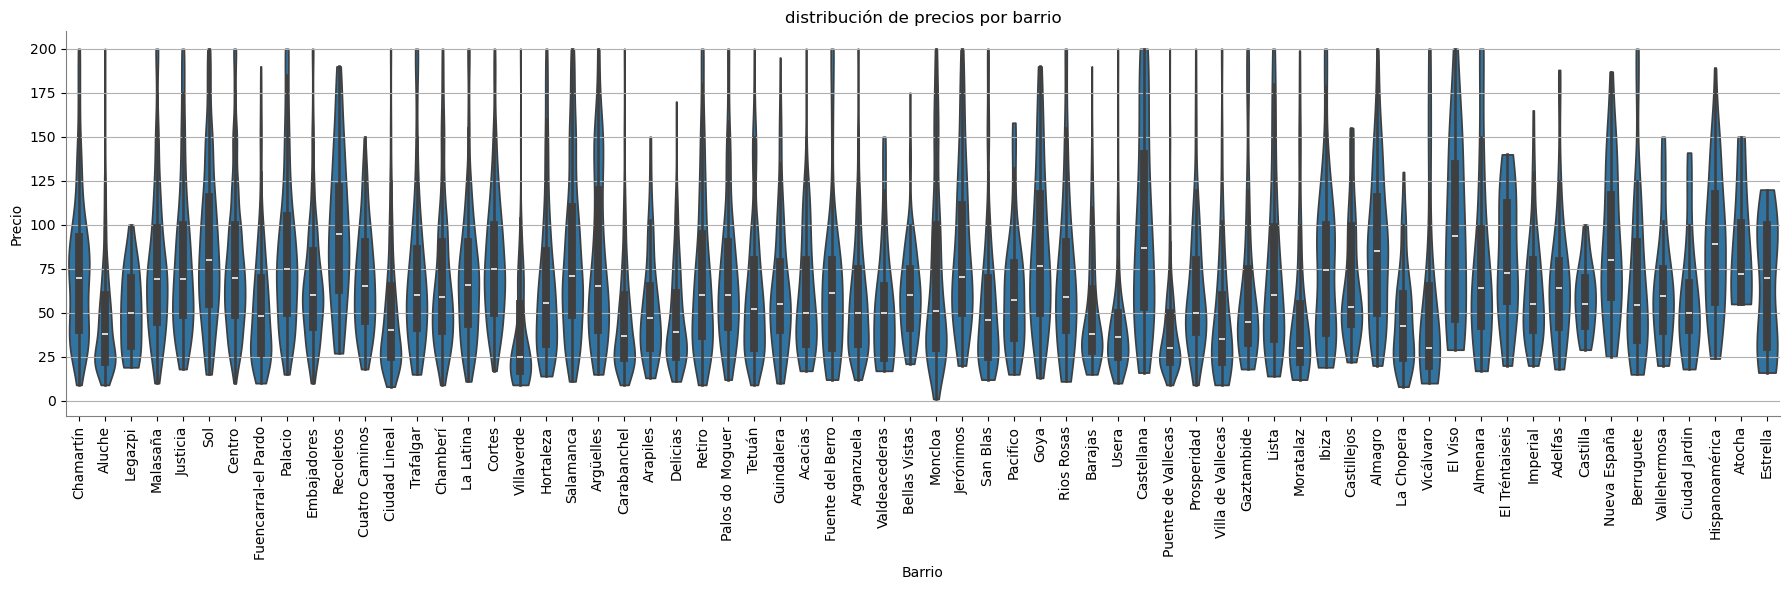

In [ ]:
# Hago un analisis de la ditribucion de precio por barrios
# Creo mi grafico
plt.figure(figsize=(18, 6)) 
ax = sns.violinplot(
    data=df_merge_noutliers,
    x='neighbourhood',
    y='price',
    density_norm ='width',
    cut=0,
    legend=False,
)

# Modifico titulos
ax.set_title('distribución de precios por barrio') 
ax.set_xlabel('Barrio')
ax.set_ylabel('Precio')

# Tal y como vimos en clase, modificamos las lineas y bordes.
ax.grid(alpha=1, drawstyle='steps', axis='y', linestyle='-') 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 3.4 En el cuarto analisis hago un analisis de correlacion con los datos sin outliers con respecto a si la distancia del aeropuerto o a sol afectaria al precio

La correlacion es negatica, pero no en gran medida, por lo que podemos decir que no afecta al precio, probablemete sea porque habra pisos en barrios muy caros y alejados del centro que desvirtuen el analisis y cuanto mas lejos de sol, mas barato van a ser, es decir, entiendo que entre -1 y 1, la correlacion es negativa, asi que una sube y otra baja, confrome mayor es la distancia, menor es el precio aunque no sea muy acusada

In [18]:
# Como el grafico puede parecer un poco lioso, saco la mediana por barrio para confirmar la importancia del lugar donde este ubicado

mediana_precio = df_merge_noutliers.groupby('neighbourhood')['price'].median().reset_index()
mediana_precio.columns = ['Barrio', 'Mediana del Precio']
mediana_precio

,Barrio,Mediana del Precio
0,Acacias,50.0
1,Adelfas,64.0
2,Almagro,85.0
3,Almenara,64.0
4,Aluche,38.0
...,...,...
61,Valdeacederas,50.0
62,Vallehermosa,59.5
63,Vicálvaro,30.0
64,Villa de Vallecas,35.0


In [ ]:

print(df_merge_noutliers[['price', 'dist_km_airport']].corr().drop(columns='price').drop(index='dist_km_airport'))
print(df_merge_noutliers[['price', 'dist_km_sol']].corr().drop(columns='price').drop(index='dist_km_sol'))


       dist_km_airport
price        -0.055665
       dist_km_sol
price    -0.199118


# 3.5 En el quinto analisis hacemos un analisis del tipo de casa. 


podemos ver que el tipo de alojamiento va a influir en cuanto al precio de lo que se busque.Como era de esperar, el tipo de casa va a fectar al precio que querramos poner, por comparar alguno, vemos que los apartahoteles tienen precios muy variados pero su mediana es mucho mayor a un chalet, por ejemplo, por lo que el tipo de vivienda afectaria tambien

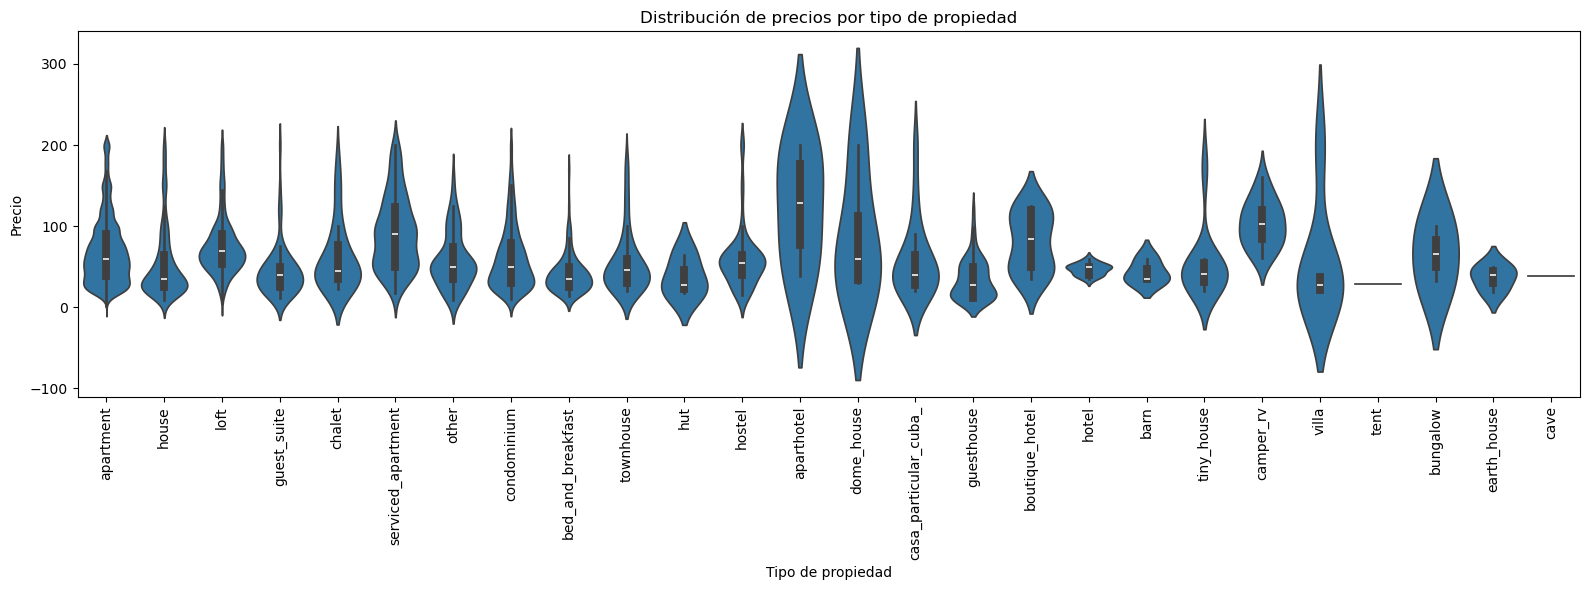

In [ ]:
plt.figure(figsize=(16, 6))
sns.violinplot(data=df_merge_noutliers, 
x='property_type', 
y='price', 
inner='box', 
density_norm ='width'
)

# Modifico titulos y roto los nombres
plt.xticks(rotation=90)
plt.title('Distribución de precios por tipo de propiedad')
plt.xlabel('Tipo de propiedad')
plt.ylabel('Precio')
plt.tight_layout()
plt.show()

# 3.5.1 Aplico filtros para concretar el analisis

In [ ]:
# ANTES DE AQUI NO CONSIDERABA IMPORTANTE PARA LOS ANALISIS QUE LO QUE ESTAMOS BUSCANDO ES OPTIMIZAR APARTAMENTOS, PERO A PARTIR DE AQUI SI, POR LO QUE CENTRO MI ANALISIS EN ESTOS.
#  Sacamos el caso de apartamento de forma aislada ya que es el que nos interesa 
df_apartamento = df_merge_noutliers[df_merge_noutliers['property_type'] == 'apartment']
df_apartamento['price'].describe()

# vemos que el precio maximo es de 200 euros, el minimo de 1 pero su mediana es de 70 euros 

count    15731.000000
mean        70.086390
std         41.828829
min          1.000000
25%         38.000000
50%         60.000000
75%         90.000000
max        200.000000
Name: price, dtype: float64

In [ ]:
# Se tambien que el numero de baños que tienen tus apartamentos es entre 1 y 3, por lo que añado esta condicion a nuestro dataframe filtrado (df_apartamento)
df_final = df_apartamento[(df_apartamento['bathrooms'] >= 1) & (df_apartamento['bathrooms'] <= 3)]

# Ahora ya tenemos nuestro dataframe definitivo, sacado de las preguntas que se realizaron por slack, tenemos apartamentos de 1 y 3 baños y precio noche menor a 200 euros

# 3.6 En nuestro 6 analisis

Vemos que para todos hay correlacion con respecto al precio, por lo cual cuanto mayor sean estas variables mayor es el precio, eso si, no significa que la correlacion sea perfecta,
para estar mas seguro de mi analisis incluiria, a parte de las graficas, un indice de correlacion. La conclusion de las graficas de abajo la muestro en el Storytelling

accommodates    0.546433
bathrooms       0.274123
bedrooms        0.418257
beds            0.441183
Name: price, dtype: float64


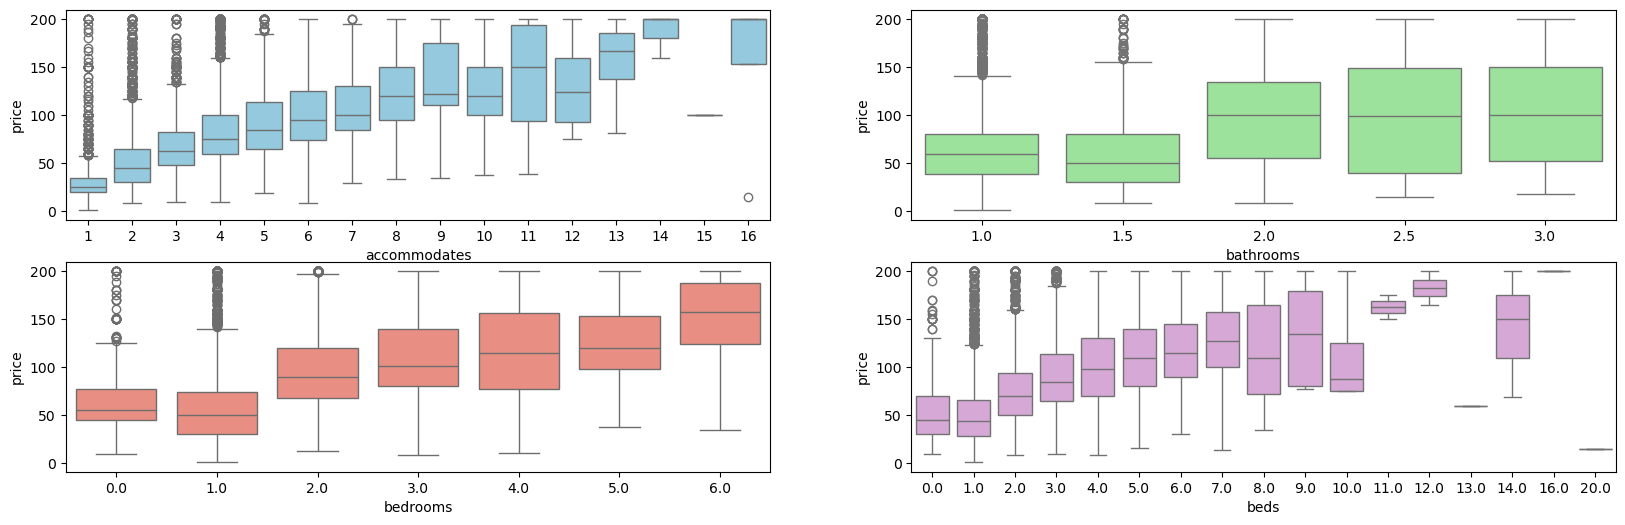

In [ ]:
# Creo mi figura 
fig,axes = plt.subplots(2,2, figsize=(20,6))
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

# Creo mis boxplots y les asigno una casilla
sns.boxplot(x='accommodates', y='price', data=df_final, ax=axes[0,0], color=colors[0])
sns.boxplot(x='bathrooms', y='price', data=df_final, ax=axes[0,1],color=colors[1])
sns.boxplot(x='bedrooms', y='price', data=df_final, ax=axes[1,0],color=colors[2])
sns.boxplot(x='beds', y='price', data=df_final, ax=axes[1,1],color=colors[3])

# Extraigo de manera numerica las correlaciones ya que los graficos pueden ser dificil de interpretar en su conjunto
caracteristicas_vars=['accommodates','bathrooms','bedrooms','beds']
correlacion_caracteristicas = df_final[caracteristicas_vars + ['price']].corr()['price'].drop('price')
print(correlacion_caracteristicas)

# Vemos que para todos hay correlacion con respecto al precio, por lo cual cuanto mayor sean estas variables mayor es el precio, eso si, no significa que la correlacion sea perfecta,
# para estar mas seguro de mi analisis incluiria, a parte de las graficas, un indice de correlacion. La conclusion de las graficas de abajo la muestro en el Storytelling

# 3.7 En nuestro analisis numero 7 

vemos que las correlaciones no son muy fuertes, pero que tenga aire acondicionado o no va a afectar al precio, en menor medida pero tambien afecta, tendriamos que tuviera
calefacción y cocina, y finalmente que tenga internet o no parece que no es muy relevante.

amenities_air_conditioning    0.336724
amenities_wifi_internet       0.009590
amenities_heating             0.113522
amenities_kitchen             0.147674
Name: price, dtype: float64


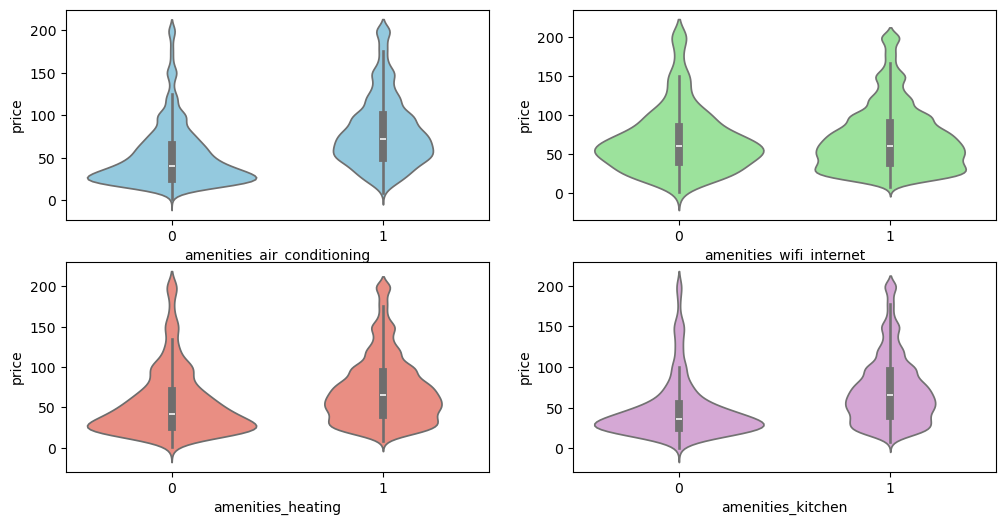

In [ ]:
# Creo mi figura 
fig,axes = plt.subplots(2,2, figsize=(12,6))
colors2 = ['skyblue', 'lightgreen', 'salmon','plum']

# Creo mis violinplots y los asignino a cada grafica
sns.violinplot(x='amenities_air_conditioning', y='price', data=df_final, ax=axes[0,0], color=colors2[0])
sns.violinplot(x='amenities_wifi_internet', y='price', data=df_final, ax=axes[0,1],color=colors2[1])
sns.violinplot(x='amenities_heating', y='price', data=df_final, ax=axes[1,0],color=colors2[2])
sns.violinplot(x='amenities_kitchen', y='price', data=df_final, ax=axes[1,1],color=colors2[3])

# Saco la correlacion numerica
amenities_vars = ['amenities_air_conditioning', 'amenities_wifi_internet', 'amenities_heating', 'amenities_kitchen']
correlacion_amenities = df_final[amenities_vars + ['price']].corr()['price'].drop('price')
print(correlacion_amenities)

# En ese caso vemos que las correlaciones no son muy fuertes, pero que tenga aire acondicionado o no va a afectar al precio, en menor medida pero tambien afecta, tendriamos que tuviera
# calefacción y cocina, y finalmente que tenga internet o no parece que no es muy relevante.

# 3.8 Hacemos un kdeplot y vemos los indicadores de precio

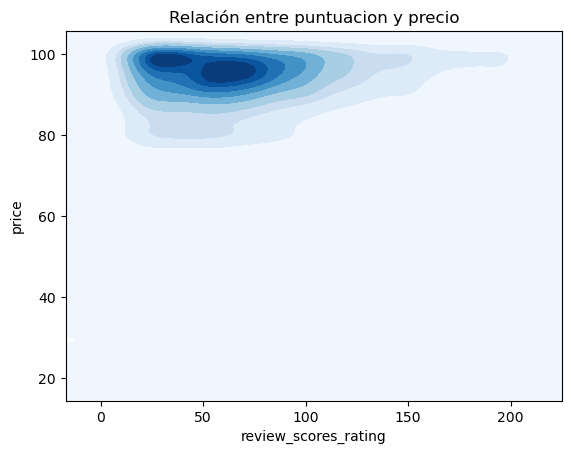

In [ ]:
# Hacemos un kdeplot para ver las puntuaciones

sns.kdeplot(
data=df_final,
x='price', 
y='review_scores_rating',
cmap="Blues", 
fill=True, 
thresh=0.0,
)

plt.title('Relación entre puntuacion y precio')
plt.xlabel('review_scores_rating')
plt.ylabel('price')
plt.show()

In [29]:
# Sacamos el analisis de manera numerica para que sea mas alcaratorio y vemos que la correlacion tambien es casi nula

print(df_final[['price', 'review_scores_rating']].corr().drop(columns='price').drop(index='review_scores_rating'))

       review_scores_rating
price              0.050007


In [ ]:
# por ultimo, necesito un analisis del precio en si, analizando su media y demas indicadores para hacerme una idea de cual seria el optimo de cada
# variable teniendo en cuenta que 200 es el precio maximo, tienen entre 1 y 3 baños y son apartamentos.

media = df_final['price'].mean()
mediana = df_final['price'].median()
moda = df_final['price'].mode()
print('La media es',media)
print('La mediana es',mediana)
print('La moda es',moda)

# calcular los quartiles de rating
rating_q_25 = df_final['price'].quantile(0.25)
rating_q_50 = df_final['price'].quantile(0.50)
rating_q_75 = df_final['price'].quantile(0.75)
print(f"Quantil 25: {rating_q_25}")
print(f"Quantil 50: {rating_q_50}")
print(f"Quantil 75: {rating_q_75}")

# Una vez hecho este analisis podemos determinar cuales son los indicadores especificos para el precio, lo unico que esta variable esta influenciada por todas las demas, es decir, es muy generica,
# he querido sacarlo como informacion adicional para el cliente pero obviamente estos valores van a depender en gran medida de varias variables como las que hemos examinado previamente 

La media es 70.2382754859819
La mediana es 60.0
La moda es 0    50.0
Name: price, dtype: float64
Quantil 25: 39.0
Quantil 50: 60.0
Quantil 75: 90.0


# 4. Recopilo los principales insights para montar el storytelling final

En este ultimo paso, me refiero, a traves de este analisis sencillo, ya que se puede profundizar mucho mas y hacer el analisis mucho mas preciso, escribo una coclusion haciendo como si yo fuera un consultor y tuviera que darle una resolucion a mi cliente

In [ ]:

"""""

Hola estimado cliente,

La estructura que vamos a seguir es la siguiente, voy a presentarte los datos para las variables que conocemos, buscas optimizar el precio de tus apartamentos, estos tienen entre 1 y 3 baños
y que el precio maximo por noche seria de unos 200 euros, independientemente de otras variables. 
Una vez tengamos estas, te daré una serie de insight sobre otras variables no tan relevantes, como si es importante tener aire acondicionado o no, entre otras,
y por ultimo una serie de tips que podria estar bien como si es recomendable ser superhost, entre otros.

Dicho esto y a modo de resumen del analisis realizado previamente, el cual se puede consultar en este mismo archivo, podemos sacar la conclusion de que:

- Los precios entre los que rondan los apartamentos es de media de unos 70 euros la noche, sin tener en cuenta otras variables como el numero de baños
- El numero de baños es importante, el precio dado anteriormente sería menor si nuestro apartamentos cuentan con 1 o 1,5 baños, pero si tenemos entre 2 y 3 el precio es superior al de la media
es decir, la mediana de nuestro primer caso (<2 baños) es sobre 45 y 60 euros por noche pero para la segunda (>2 y <=3) es de 1oo euros llegando hasta un maximo de 150 euros la noche en algunos casos, 
tal y como podemos ver en el boxplot que realizamos en nuestro analisis

Atendiendo a solo estas 3 variables, y desde mi punto de vista, pondria un precio de entre 50 y 60 euros, y como maximo 80 euros por noche para los apartamentos de menos de 2 baños (ya que queremos maximizar el beneficio)
y para los que tengan mas de 2, un precio que ronde los 100 euros, y como maximo 150 euros la noche, ya que nuestros quartiles 75 se situan sobre estos valores, por lo que no seria nada descabellado.

A pesar de lo anterior, este precio se estableceria obviando muchas variables que realmente van a afectar y mucho al precio, como es el barrio donde se encuentre, por lo que tendrias que tener 
en cuenta este punto, ademas voy a mencionar otros ejemplos de puntos a tener en cuenta.

- La distancia al aeropuerto no es importante, pero si podemos decir que conforme nos alejamos de sol, el precio suele verse afectado levemente, tendiendo a la baja. Si tus pisos se situan cerca del centro podras subir un poco el precio.
- El precio será mayor comforme mas huespedes puedas acoger, logicamente.
- Conforme mas habitaciones mas alto podrá ser el precio, en el caso de que, por ejemplo, tengamos 6, el precio podría llegar a subir hasta 180 – 190 euros, pero su mediana seria de unos 160 euros por noche, de normal entiendo que tendremos entre 2 3 o 4, por lo que el precio máximo podría rondar entre 140 y 150 euros por noche, siendo la mediana de entre 100 y 130 euros la noche dependiendo de si hay mas camas o menos
- El numero de camas también afecta, si tenemos de sobre 3 a 6 camas, nuestro precio por noche podría variar entre 60 y 140 euros la noche, siendo su media por noche de entre 80 y 110 euros
-Seguidamente es importante tener en cuenta que tener calefación y aire acondicionado afecta al precio, la diferencia de precio podría ser de entre 20 euros de media por noche en caso de tener calefacion, de 25 – 30 euros si hay aire acondicionado, y de otros 25 si hay cocina o no. 
Por otro lado el tener wifi o no, no parece muy relevante por lo que te lo pudes ahorrar si quieres.
- Finalmente he examinado otras variables no tan relevantes como es el caso de el numero de reviews que tengas, la puntuación, si eres superhost o no, o si tienes verificados los datos y, obviamente, aunque no tengan un efecto significativo a la hora de poner el precio, considero que es un punto a tener en cuenta ya que al cliente le dara confianza a la hora de realizar la reserva contigo, ya que aunque el precio fuera a ser el mismo, la demanda seguramente sería mayor, son variables que intentaría cuidar.

A modo de conclusion, 

He analizado muchas variables para utilizar distintos tipos de analisis, si en este analisis tuviera unicamente las 3 variables principales pondria el precio en relacion al primer punto comentado, pero no es el caso.

- Una variable muy importante es la localizacion, que creo que deberia haberla preguntado ya que condiciona todo el analisis y va a ser clave a la hora de derminar el precio.
- El numero de baños y habitaciones afecta, cuanto mas baños y habitaciones mas caro el precio
- Tener cocina, aire acondicionado y calefaccion aumenta el precio por noche (arriba especifico en cuanto), el wifi es irrelevante
- Pondria una política de cancelación moderada o de un periodo de gracia de hasta 14 días para minimizar perdidas
- El resto de variables, como ser superhost, reseñas, verificaciones de perfil y demas no van a afectar al precio en gran medida pero recomiendo que se cuiden y tengan en cuenta.

"""""